# Mount drive



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Face recognition video

Run with GPU

Source code from https://www.pyimagesearch.com/2018/06/18/face-recognition-with-opencv-python-and-deep-learning/

In [2]:
!pip install face_recognition
import face_recognition
import imutils
import pickle
import time
import cv2
import dlib
import time
print('Are we using GPU? :', dlib.DLIB_USE_CUDA)


Are we using GPU? : True


In [3]:


# paths


start_time = time.time()


path_encoding = '/content/gdrive/My Drive/COMPUTER VISION/face_recognition/encodings.pickle'
path_video = '/content/gdrive/My Drive/COMPUTER VISION/face_recognition/videos/fight_club_philosophy.mp4'
path_output = '/content/gdrive/My Drive/COMPUTER VISION/face_recognition/output/fight_club_philosophy_output1.mp4'
detection_method = 'cnn'

count = {'brad_pitt':0,
         'edward_norton':0}

posicion = {'brad_pitt':13,
         'edward_norton':28}

# load the known faces and embeddings
print("[INFO] loading encodings...")
data = pickle.loads(open(path_encoding, "rb").read())

# initialize the pointer to the video file and the video writer
print("[INFO] processing video...")
stream = cv2.VideoCapture(path_video)
total_frames = int(stream.get(cv2.CAP_PROP_FRAME_COUNT))
width  = stream.get(cv2.CAP_PROP_FRAME_WIDTH)
writer = None

# loop over frames from the video file stream
while True:
	# grab the next frame
	(grabbed, frame) = stream.read()

	# if the frame was not grabbed, then we have reached the
	# end of the stream
	if not grabbed:
		break

	
	# convert the input frame from BGR to RGB then resize it to have
	# a width of 750px (to speedup processing)
	rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
	rgb = imutils.resize(frame, width=750)
	r = frame.shape[1] / float(rgb.shape[1])
 
	

	# detect the (x, y)-coordinates of the bounding boxes
	# corresponding to each face in the input frame, then compute
	# the facial embeddings for each face
	boxes = face_recognition.face_locations(rgb,
		model=detection_method)
	encodings = face_recognition.face_encodings(rgb, boxes)
	names = []

	# loop over the facial embeddings
	for encoding in encodings:
		# attempt to match each face in the input image to our known
		# encodings
		matches = face_recognition.compare_faces(data["encodings"],
			encoding)
		name = "Unknown"

		# check to see if we have found a match
		if True in matches:
			# find the indexes of all matched faces then initialize a
			# dictionary to count the total number of times each face
			# was matched
			matchedIdxs = [i for (i, b) in enumerate(matches) if b]
			counts = {}

			# loop over the matched indexes and maintain a count for
			# each recognized face face
			for i in matchedIdxs:
				name = data["names"][i]
				counts[name] = counts.get(name, 0) + 1

			# determine the recognized face with the largest number
			# of votes (note: in the event of an unlikely tie Python
			# will select first entry in the dictionary)
			name = max(counts, key=counts.get)
		
		# update the list of names
		names.append(name)

	# loop over the recognized faces
	for ((top, right, bottom, left), name) in zip(boxes, names):
		# rescale the face coordinates
		top = int(top * r)
		right = int(right * r)
		bottom = int(bottom * r)
		left = int(left * r)
		count[name]+=1
		# draw the predicted face name on the image
		cv2.rectangle(frame, (left, top), (right, bottom),
			(0, 255, 0), 2)
		y = top - 15 if top - 15 > 15 else top + 15
		cv2.putText(frame, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,
			0.75, (0, 255, 0), 2)
		for name in count:
		  cv2.line(frame, (0,posicion[name]), (int(count[name]/total_frames*width*0.75),posicion[name]), (0, 255, 0) , 8) 
		  cv2.putText(frame, name, (int(count[name]/total_frames*width*0.75)+15, posicion[name]+1), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2) 

	# if the video writer is None *AND* we are supposed to write
	# the output video to disk initialize the writer
	if writer is None and path_output is not None:
		fourcc = cv2.VideoWriter_fourcc(*"MJPG")
		writer = cv2.VideoWriter(path_output, fourcc, 24,
			(frame.shape[1], frame.shape[0]), True)

	# if the writer is not None, write the frame with recognized
	# faces t odisk
	if writer is not None:
		writer.write(frame)



# close the video file pointers
stream.release()

# check to see if the video writer point needs to be released
if writer is not None:
	writer.release()
 
print("[INFO] --- %s seconds ---" % (time.time() - start_time))

[INFO] loading encodings...
[INFO] processing video...
[INFO] --- 209.87323999404907 seconds ---


In [5]:
count

{'brad_pitt': 1697, 'edward_norton': 1220}

In [11]:
list(count.keys())

['brad_pitt', 'edward_norton']

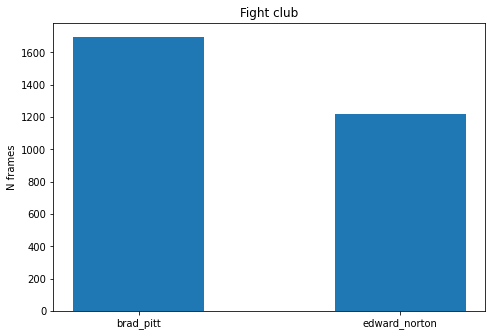

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = list(count.keys())
detected = list(count.values())
ax.bar(names,detected,width=0.5)
ax.set_ylabel('N frames')
ax.set_title('Fight club')
plt.show()